Using GPT generated results for now

Saved simulated_CCSM_log_small.csv with 2000000 rows


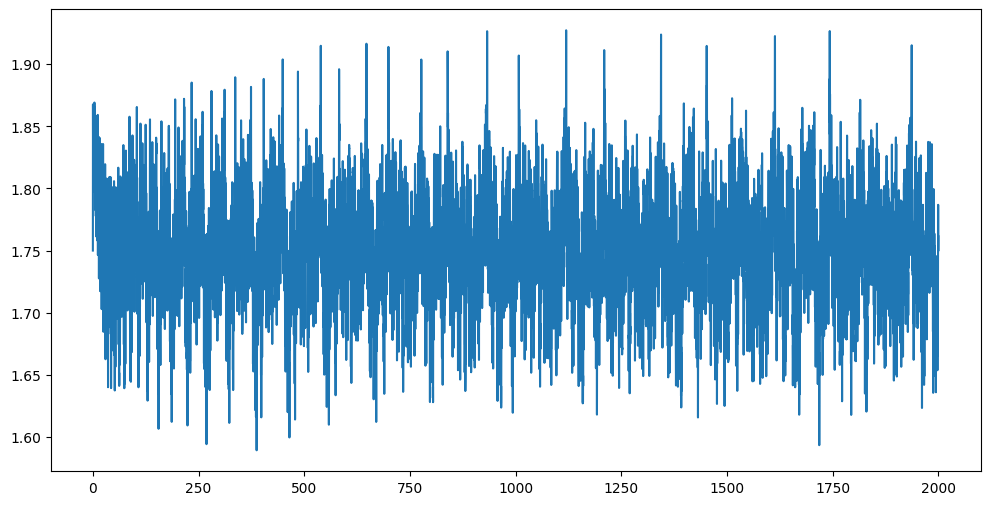

In [9]:
import numpy as np
import pandas as pd

# ------------------
# Simulation parameters
# ------------------
fs = 1000        # Hz   (reduce from 1000 to keep file small)
duration_s = 2000  # seconds
cell_capacity_Ah = 3.5
I_CC = 0.5 * cell_capacity_Ah  # 0.5 C

frequencies = np.logspace(np.log10(0.01), np.log10(2), 30)
I_amp = 0.2 * I_CC
N = len(frequencies)

# Time array
t = np.arange(0, duration_s, 1/fs)

# CCSM waveform
I_signal = I_CC + (I_amp / N) * np.sum(
    [np.sin(2 * np.pi * f * t) for f in frequencies],
    axis=0
)

# Capacity integration
capacity_ah = np.cumsum(I_signal) / fs / 3600

# Linear OCV rise
OCV = 3.0 + 0.7 * (capacity_ah / cell_capacity_Ah)

# Impedance baseline + plating bump at ~70% SOC
true_Z = 0.05 + 0.005 * (capacity_ah / cell_capacity_Ah)
onset_soc = 0.7
true_Z[capacity_ah / cell_capacity_Ah > onset_soc] += 0.02

# Voltage signal + small Gaussian noise
U_signal = OCV + I_signal * true_Z + 0.002 * np.random.randn(len(t))

# Save small CSV
df = pd.DataFrame({
    "time_s": t,
    "current_A": I_signal,
    "voltage_V": U_signal
})
df.to_csv("simulated_CCSM_log_small.csv", index=False)

import matplotlib.pyplot as plt
plt.subplots(figsize=(12, 6))
# plt.plot(t, U_signal, label='Voltage (V)')
plt.plot(t, I_signal, label='Current (A)')

print("Saved simulated_CCSM_log_small.csv with", len(df), "rows")
